The class label of the first example: [5]


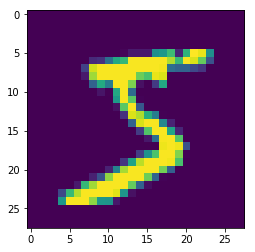

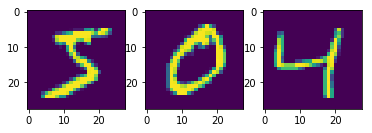

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
q1_digits = np.load('q1_data/q1_digits.npz')
digits_train = q1_digits['digits_train']
labels_train = q1_digits['labels_train']

# Display an image of a digit
plt.figure()
plt.imshow(digits_train[0,:,:]) # first example in the training dataset
#plt.savefig('digit.png')

# Print the class of the first example
print('The class label of the first example:', labels_train[0])

# Plot multiple images (1 by 3)
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(digits_train[0,:,:])
ax[1].imshow(digits_train[1,:,:])
ax[2].imshow(digits_train[2,:,:])
#plt.savefig('many_digit.png')

In [2]:
digits_test = q1_digits['digits_test']
labels_test = q1_digits['labels_test']

## Distance

In [3]:
def distance(x_1,x_2):
    return np.sqrt(np.sum((x_1 - x_2)**2))

## 1.

In [4]:
def Knn(k,X,xtest):
    x_list = {}
    for i in range(1000):
        xtrain = X[i]
        d = distance(X[i],xtest)
        x_list[i] = d
    x_result = sorted(x_list,key = x_list.get)[0:k]
    return x_result

In [5]:
def knn_result(indice_list,labels_train):
    sort_list = {}
    for t in indice_list:
        label = labels_train[t][0]
        if label not in sort_list:
            sort_list[label] = 1
        else:
            sort_list[label] += 1
    result = sorted(sort_list,key = sort_list.get)[-1]
    return result

In [6]:
for m in range(5):
    print("Test digit {} with class label: {}".format(m, labels_test[m]))
    x_induce = Knn(8,digits_train,digits_test[m])
    label = []
    for i in x_induce:
        print("Indice: {}".format(i))
        print("Class lable: {}".format(labels_train[i]))
        label.append(labels_train[i][0])
    res = knn_result(x_induce,labels_train)
    print(x_induce)
    print(label)
    print("result of classify is {}".format(res))
    print("=========================================================")

Test digit 0 with class label: [0]
Indice: 952
Class lable: [0]
Indice: 690
Class lable: [5]
Indice: 320
Class lable: [0]
Indice: 210
Class lable: [0]
Indice: 192
Class lable: [0]
Indice: 836
Class lable: [5]
Indice: 81
Class lable: [0]
Indice: 542
Class lable: [0]
[952, 690, 320, 210, 192, 836, 81, 542]
[0, 5, 0, 0, 0, 5, 0, 0]
result of classify is 0
Test digit 1 with class label: [7]
Indice: 723
Class lable: [7]
Indice: 753
Class lable: [7]
Indice: 71
Class lable: [7]
Indice: 15
Class lable: [7]
Indice: 911
Class lable: [7]
Indice: 981
Class lable: [7]
Indice: 193
Class lable: [7]
Indice: 79
Class lable: [7]
[723, 753, 71, 15, 911, 981, 193, 79]
[7, 7, 7, 7, 7, 7, 7, 7]
result of classify is 7
Test digit 2 with class label: [1]
Indice: 484
Class lable: [1]
Indice: 398
Class lable: [1]
Indice: 454
Class lable: [1]
Indice: 638
Class lable: [1]
Indice: 8
Class lable: [1]
Indice: 678
Class lable: [1]
Indice: 112
Class lable: [1]
Indice: 310
Class lable: [1]
[484, 398, 454, 638, 8, 678, 

## 2.

In [8]:
right = 0
wrong = 0
for i in range(1000):
    result = knn_result(Knn(10,digits_train,digits_test[i]), labels_train)
    if result == labels_test[i][0]:
        right += 1
    else:
#         print("Induce of test is {}, true label is {}, result is {}".format(i,))
        wrong += 1
print("Accuracy: {}".format(right/(right + wrong)))

Accuracy: 0.85


### 3.

In [11]:
acc = []
klist = [1,5,10,20,30,40,50]
for k in klist:
    right = 0
    wrong = 0
    for i in range(1000):
        result = knn_result(Knn(k,digits_train,digits_test[i]), labels_train)
        if result == labels_test[i][0]:
            right += 1
        else:
#         print("Induce of test is {}, true label is {}, result is {}".format(i,))
            wrong += 1
    print("Accuracy: {}".format(right/(right + wrong)))
    acc.append(right/(right + wrong))

Accuracy: 0.883
Accuracy: 0.857
Accuracy: 0.85
Accuracy: 0.818
Accuracy: 0.781
Accuracy: 0.773
Accuracy: 0.75


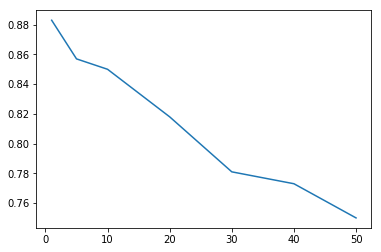

In [12]:
plt.plot(klist, acc)

### 4.

In [13]:
def distance(x_1,x_2):
    return 1 - np.sum(x_1*x_2)/(np.sqrt(np.sum((x_1)**2)) * np.sqrt(np.sum((x_2)**2)))

In [14]:
right = 0
wrong = 0
for i in range(1000):
    result = knn_result(Knn(10,digits_train,digits_test[i]), labels_train)
    if result == labels_test[i][0]:
        right += 1
    else:
        wrong += 1
print("Accuracy: {}".format(right/(right + wrong)))

Accuracy: 0.87
